<a href="https://colab.research.google.com/github/Tus-ver/INSE_622-_Project/blob/main/inse6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyspc: filename=pyspc-0.4-py3-none-any.whl size=30874 sha256=2cdefcae1bcb3ff4e279d3292b182c198366aa04996c3059ce3902cbccf3a100
  Stored in directory: /root/.cache/pip/wheels/1d/44/7a/6e67f7829fdbfd1e005ebaeb96ba96499d08af1d92c58d73d7
Successfully built pyspc


In [2]:
from pyspc import spc, xbar_rbar, rbar, rules
import numpy as np
#from scipy import stats
from scipy.stats import norm
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [3]:
uploaded = files.upload()

Saving accelerometernew.csv to accelerometernew.csv


In [4]:
X = pd.read_csv('accelerometernew.csv', index_col=0)
print(X)

         pctid      x      y      z
wconfid                            
1           20  1.035 -0.027 -0.133
1           20  1.004  0.090 -0.125
1           20  1.004 -0.043 -0.125
1           20  0.969  0.090 -0.121
1           20  0.973 -0.012 -0.137
1           30  0.984 -0.035 -0.125
1           30  0.984 -0.004 -0.137
1           30  1.000  0.098 -0.125
1           30  1.031 -0.012 -0.129
1           30  0.965 -0.148 -0.152
1           25  1.016  0.023 -0.121
1           25  0.988 -0.121 -0.156
1           25  0.992 -0.035 -0.137
1           25  1.000  0.039 -0.125
1           25  0.992 -0.094 -0.156
1           40  1.031  0.082 -0.121
1           40  0.984 -0.043 -0.152
1           40  0.973 -0.078 -0.125
1           40  1.027  0.074 -0.125
1           40  0.988 -0.008 -0.141
1           50  0.973 -0.152 -0.152
1           50  1.004  0.074 -0.137
1           50  1.012 -0.027 -0.137
1           50  0.965 -0.133 -0.148
1           50  1.004  0.086 -0.125
1           60  0.957 -0.148

ValueError: ignored

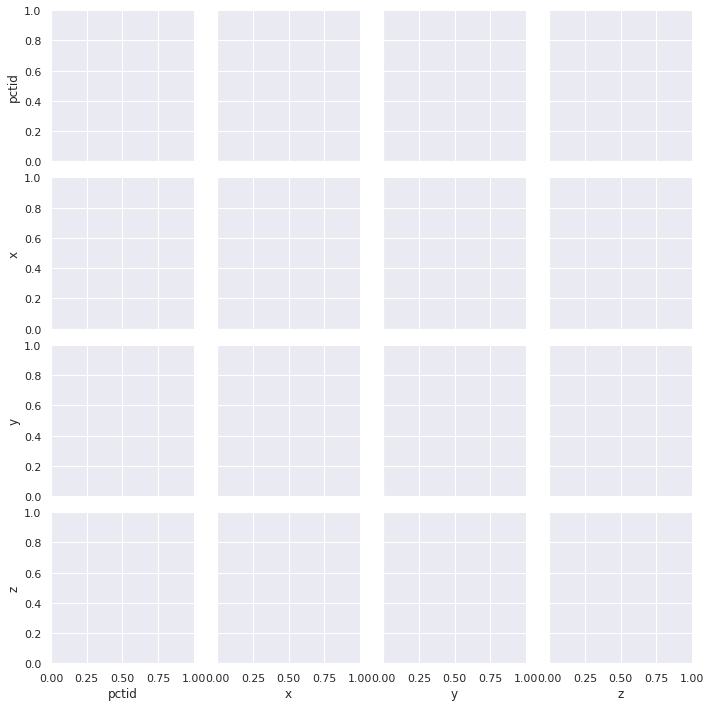

In [8]:
#pairplot
sns.pairplot(X)

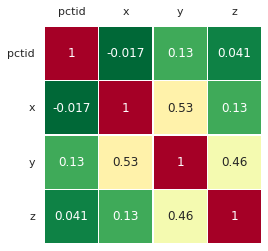

In [9]:
#Correlation matrix
plt.figure()
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)

In [10]:
#(a) and (b)
X = np.array(X)
Xbar = np.mean(X, axis=1)
Xbarbar = np.mean(Xbar)
R = np.ptp(X, axis=1)
Rbar = np.mean(R)
d2 = 2.059
sigmahat = Rbar/d2
print('The process mean and standard deviation are:')
print('Xbarbar = {0:.2f}, sigmahat = {1:.2f}'.format(Xbarbar, sigmahat))

The process mean and standard deviation are:
Xbarbar = 14.34, sigmahat = 27.51


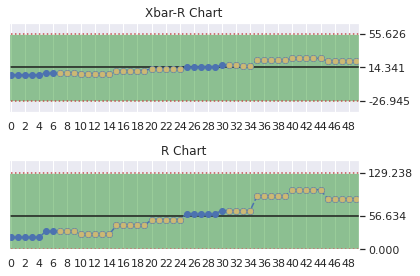

<pyspc: (8745302110461)>


In [11]:
#(c) Plot X-bar and R charts
chart = spc(X) + xbar_rbar() + rbar() + rules()
print(chart)

In [12]:
#(d) 
LSL = 1;  USL = 11
Cp = (USL-LSL)/(6*sigmahat)
CpL = (Xbarbar-LSL)/(3*sigmahat)
CpU = (USL-Xbarbar)/(3*sigmahat)
Cpk = np.min([CpL, CpU])
print('The process capability indices are:')
print('Cp = {0:.2f}, CpL = {1:.2f}, CpU = {2:.2f}, Cpk = {3:.2f}'.format(Cp, CpL, CpU, Cpk))
#Percentage of Nonconforming
PNC = 1-(norm.cdf((USL-Xbarbar)/sigmahat)-norm.cdf((LSL-Xbarbar)/sigmahat))
print('The total percentage of nonconforming produced by the process is:')
print('PNC = {:.4f}'.format(PNC))

The process capability indices are:
Cp = 0.06, CpL = 0.16, CpU = -0.04, Cpk = -0.04
The total percentage of nonconforming produced by the process is:
PNC = 0.8622


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [14]:
#read cvs file into dataframe
df = pd.read_csv('accelerometernew.csv', index_col=0)
##!pip install xlrd
##df = pd.read_excel('accelerometernew.xls')
print(df.head())

         pctid      x      y      z
wconfid                            
1           20  1.035 -0.027 -0.133
1           20  1.004  0.090 -0.125
1           20  1.004 -0.043 -0.125
1           20  0.969  0.090 -0.121
1           20  0.973 -0.012 -0.137


In [15]:
#m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data

In [16]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 1
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pctid   50 non-null     float64
 1   x       50 non-null     float64
 2   y       50 non-null     float64
 3   z       50 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [17]:
observations = list(df.index)
variables = list(df.columns)

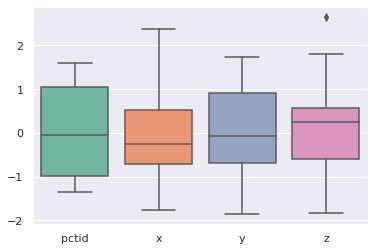

In [18]:
sns.boxplot(data=df, orient="v", palette="Set2")

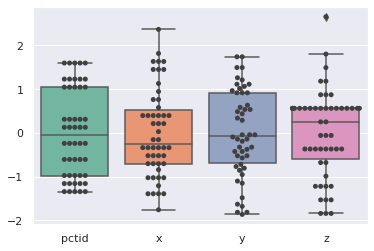

In [19]:
##Use swarmplot() to show the datapoints on top of the boxes:
#plt. figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25") 

ValueError: ignored

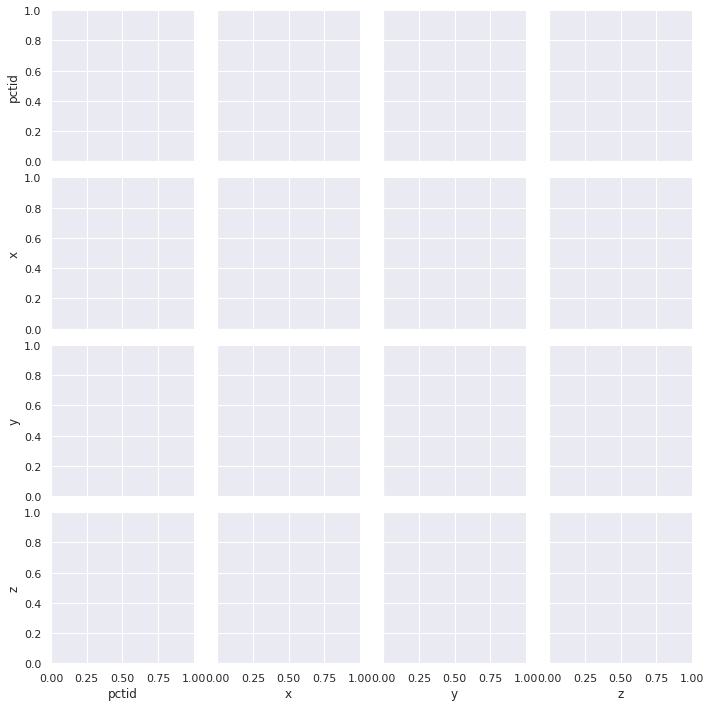

In [20]:
#pairplot
sns.pairplot(df)

Text(0.5, 1.0, 'Covariance matrix')

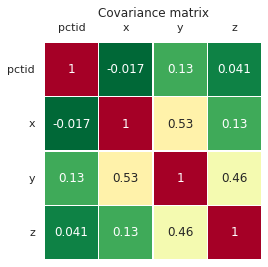

In [21]:
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Covariance matrix')

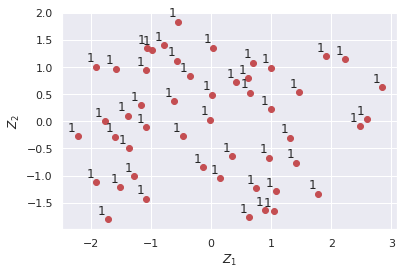

In [22]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

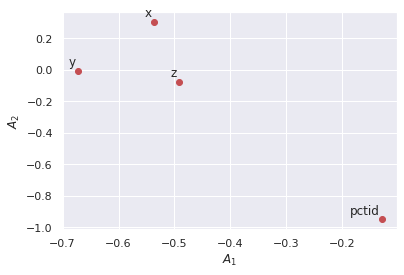

In [23]:
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

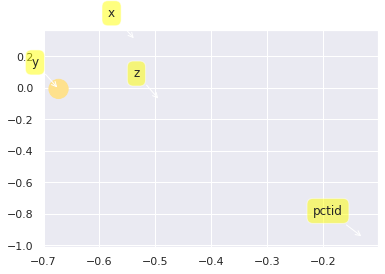

In [24]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

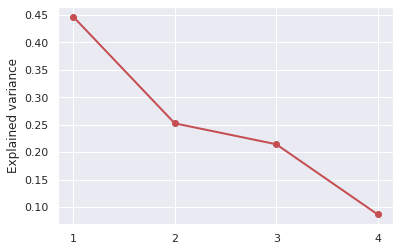

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Text(0, 0.5, 'Cumulative explained variance')

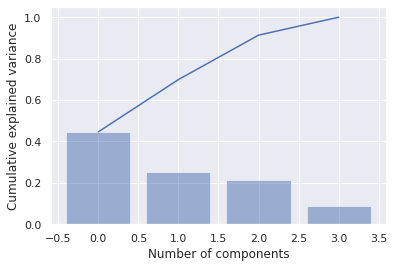

In [26]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

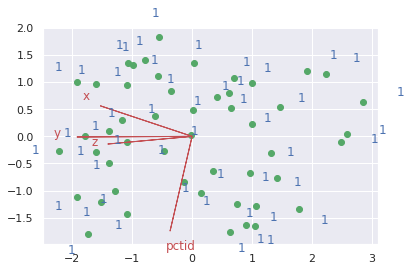

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

Text(0.5, 1.0, 'Principal components')

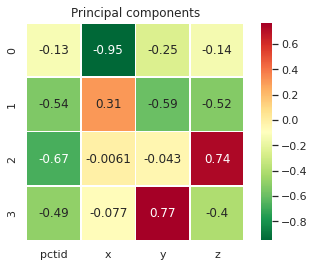

In [28]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [38]:
len(df.index)

50

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 1
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pctid   50 non-null     float64
 1   x       50 non-null     float64
 2   y       50 non-null     float64
 3   z       50 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [40]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [41]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


KeyError: ignored

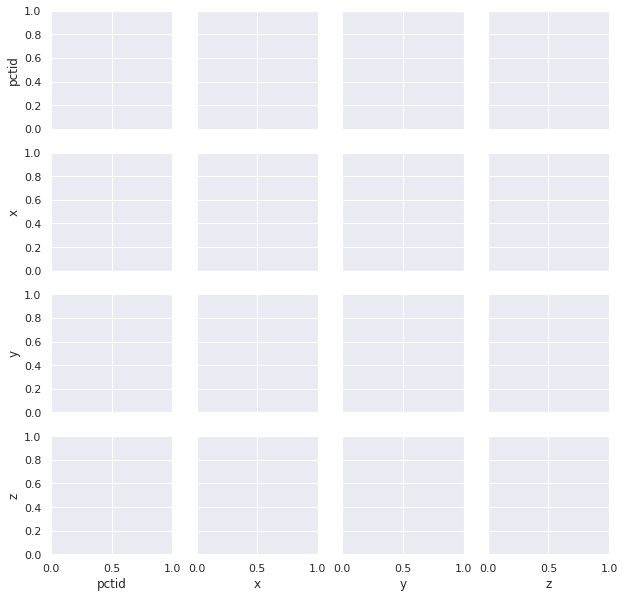

In [42]:
sns.pairplot(df, hue='accelerometer')
plt.show()

In [43]:
y =df['Speed']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

KeyError: ignored

Text(0, 0.5, '$Z_2$')

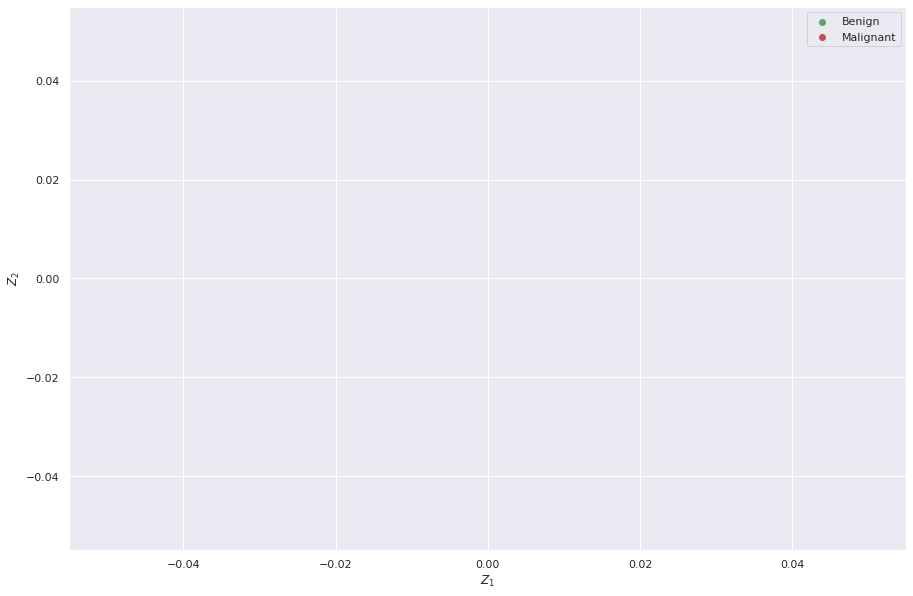

In [44]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

In [45]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

array([ 0.00574246, -0.10549774,  0.02561428, -0.10050165,  0.00061685,
        0.02469608, -0.00498573, -0.10883369, -0.00478683,  0.14093889,
       -0.03958182,  0.10916635,  0.02239232, -0.05264424,  0.08194518,
       -0.09409184,  0.03850439,  0.07269393, -0.08530826,  0.00259183,
        0.15156535, -0.07700856,  0.02134885,  0.13375122, -0.08971635,
        0.15113198, -0.04096295,  0.00383027,  0.13878654, -0.14059399,
       -0.03699673, -0.13741209, -0.04261653,  0.07408911,  0.06658214,
        0.07596246, -0.05966572,  0.07920607,  0.04671674, -0.10451786,
       -0.06557513,  0.06621614,  0.10714217, -0.03790064,  0.03587573,
       -0.04095328, -0.01415408, -0.09759028, -0.10890673,  0.01369541])

ValueError: ignored

<Figure size 1080x720 with 1 Axes>

In [46]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=2a32f9e62d55e0438dd20d4a288896903aecba8ee119f672eab8a2f06ab560ff
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=55a4151114cfbe5c9bc61029826146413c5df7daca77ac8b727ec400df39e684
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9eba8b723fa2b043db41a7b0cb4ec89582fb7720d83037ee660a50987b5fd089
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built adjustText sklearn wget


In [47]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [48]:
out['PC']

,PC1
1.0,-36.500008
1.0,-36.499961
1.0,-36.500014
1.0,-36.499960
1.0,-36.500001
1.0,-26.500011
1.0,-26.499999
1.0,-26.499958
1.0,-26.500003
1.0,-26.500057


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f42c77cd1d0>)

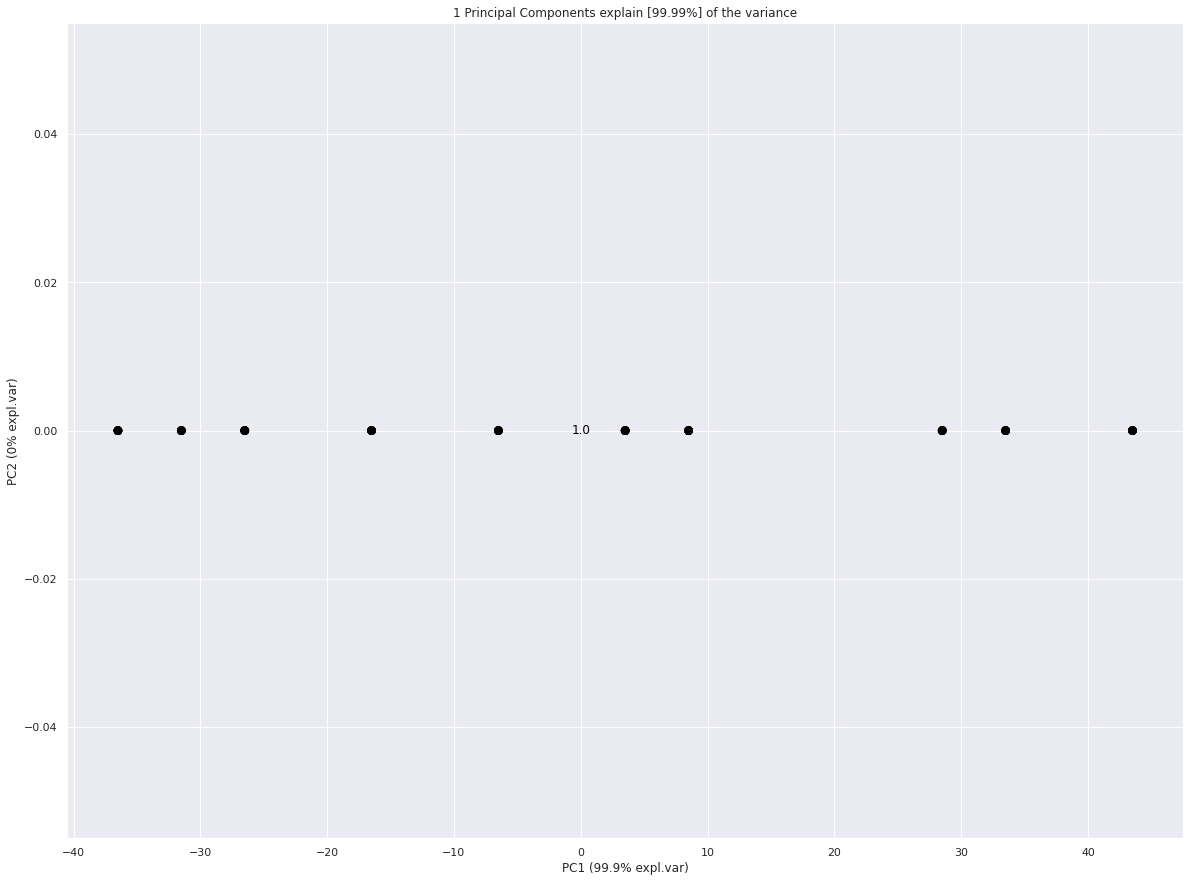

In [49]:
model.scatter(label=True, legend=False)

In [50]:
A = out['loadings'].T
A

,PC1
1,1.000000
2,-0.000014
3,0.000401
4,0.000019


In [51]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

ValueError: ignored

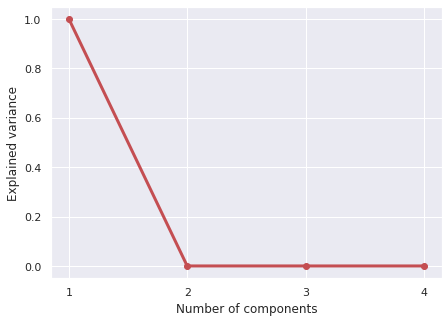

In [52]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

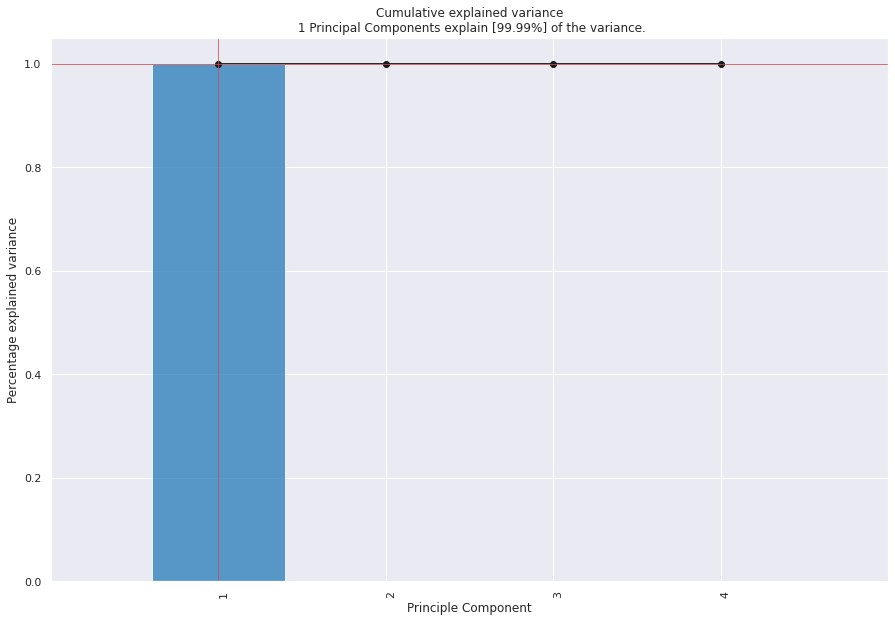

<Figure size 504x360 with 0 Axes>

In [53]:
model.plot();

In [54]:
model.biplot(label=False, legend=False, color_arrow='k')

ValueError: ignored

In [55]:
qda=create_model('qda')


NameError: ignored

In [56]:
tuned_qda

NameError: ignored